In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#here we're going to analyze the different classes of cars over the years for Spa Francorchomps, one of the most iconic tracks in racing.
fia_wec_data = pd.read_csv('2012-2022_FIA_WEC_FULL_LAP_DATA.csv', index_col = 0)

#Need to do this in the actual df 
fia_wec_data['circuit'] = fia_wec_data['circuit'].str.replace("_", " ")

C:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (23,26,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fia_wec_data['circuit'] = fia_wec_data['circuit'].str.strip()
fia_wec_data.groupby('circuit').mean()

,number,driver_number,lap_number,lap_improvement,s1_improvement,s2_improvement,s3_improvement,kph,top_speed,round,lap_time_ms,lap_time_s
circuit,,,,,,,,,,,,
AUTODROMO DO ALGARVE,73.417502,1.953973,139.358192,0.007574,0.014565,0.014565,0.014565,167.072605,280.760668,2.000000,102838.164763,102.838165
AUTODROMO HERMANOS RODRIGUEZ,45.966858,0.880398,104.257663,0.010131,0.018460,0.018460,0.018460,153.812012,263.306989,5.000000,104776.235769,104.776236
AUTODROMO NAZIONALE DI MONZA,109.952956,1.956469,94.301207,0.011150,0.020926,0.020926,0.020926,190.493447,270.262685,3.000000,116405.257675,116.405258
BAHRAIN INTERNATIONAL CIRCUIT,45.945946,0.876833,88.360840,0.011932,0.021852,0.021888,0.021888,163.633450,248.639128,7.889556,122152.884991,122.152885
BAHRAIN INTERNATIONAL CIRCUIT 2019,52.563885,1.910066,116.927714,0.008895,0.016801,0.016801,0.016801,164.083835,250.671994,4.000000,121573.734011,121.573734
BAHRAIN INTERNATIONAL CIRCUIT 2020,60.418988,1.874059,119.632685,0.008583,0.015940,0.015940,0.015940,163.177246,248.952559,8.000000,121354.521457,121.354521
BAHRAIN INTERNATIONAL CIRCUIT 6 HOURS,72.228239,1.961929,87.847718,0.011643,0.022362,0.022362,0.022362,159.670985,247.206636,5.000000,124311.555350,124.311555
BAHRAIN INTERNATIONAL CIRCUIT 8 HOURS,72.465933,1.959434,115.639337,0.008999,0.017426,0.017426,0.017426,160.632324,248.664605,6.000000,124608.361663,124.608362
CIRCUIT OF THE AMERICAS,49.651814,1.100186,82.773615,0.012665,0.023511,0.023511,0.023511,158.460627,256.431060,5.222972,131707.188958,131.707189


In [4]:
#I think it should have it by class, but first let's grab Spa data itself
spa_data = fia_wec_data[(fia_wec_data['circuit'] == 'SPA FRANCORCHAMPS')|(fia_wec_data['circuit'] == 'SPA FRANCORCHAMPS 2019')].reset_index(drop=True)
spa_data.season = spa_data['season'].map(str)
spa_data

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
0,50.0,1.0,1.0,2:30.629,0.0,NaN,47.784,0.0,1:06.568,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,150629.0,150.629,Chevrolet
1,50.0,1.0,2.0,2:21.182,0.0,NaN,40.220,0.0,1:04.907,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141182.0,141.182,Chevrolet
2,50.0,1.0,3.0,2:21.573,0.0,NaN,40.229,0.0,1:05.304,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141573.0,141.573,Chevrolet
3,50.0,1.0,4.0,2:21.056,2.0,NaN,40.024,2.0,1:04.851,2.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141056.0,141.056,Chevrolet
4,50.0,1.0,5.0,2:21.851,0.0,NaN,40.302,0.0,1:05.192,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141851.0,141.851,Chevrolet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,26.0,2.0,121.0,2:07.462,0.0,NaN,36.133,0.0,58.604,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127462.0,127.462,Gibson
45090,26.0,2.0,122.0,2:08.002,0.0,NaN,36.191,0.0,59.150,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128002.0,128.002,Gibson
45091,26.0,2.0,123.0,2:07.563,0.0,NaN,36.080,0.0,58.892,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127563.0,127.563,Gibson
45092,26.0,2.0,124.0,2:08.591,0.0,NaN,36.003,0.0,59.913,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128591.0,128.591,Gibson


In [5]:
#2018-2019 spa was run twice, so we should probably separate 2018 and 2019
#I separated spa into the 2018 and 2019 race, so we can pull out 2018 and map it
spa_2018 = spa_data[(spa_data['circuit'] == 'SPA FRANCORCHAMPS')&(spa_data['season'] == "2018-2019")]
spa_2018.season = "2018"
spa_2018

C:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
10869,51.0,0.0,1.0,2:32.302,0.0,NaN,44.323,0.0,1:05.095,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,152302.0,152.302,Ferrari
10870,51.0,0.0,2.0,3:34.282,0.0,NaN,1:08.417,0.0,1:42.391,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,214282.0,214.282,Ferrari
10871,51.0,0.0,3.0,2:35.286,0.0,NaN,44.269,0.0,1:09.725,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,155286.0,155.286,Ferrari
10872,51.0,0.0,4.0,2:17.555,0.0,NaN,39.606,0.0,1:02.729,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,137555.0,137.555,Ferrari
10873,51.0,0.0,5.0,2:17.385,0.0,NaN,39.423,0.0,1:02.656,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,137385.0,137.385,Ferrari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44678,26.0,1.0,152.0,2:10.022,0.0,NaN,36.192,0.0,59.715,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,130022.0,130.022,Gibson
44679,26.0,1.0,153.0,2:09.874,0.0,NaN,36.296,0.0,59.915,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,129874.0,129.874,Gibson
44680,26.0,1.0,154.0,2:08.608,0.0,NaN,36.191,0.0,59.464,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128608.0,128.608,Gibson
44681,26.0,1.0,155.0,2:10.411,0.0,NaN,36.172,0.0,59.765,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,130411.0,130.411,Gibson


In [6]:
spa_2019 = spa_data[(spa_data['circuit'] == 'SPA FRANCORCHAMPS 2019')]
spa_2019.season = "2019"
spa_2019

C:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
13467,51.0,1.0,1.0,2:28.771,0.0,NaN,47.599,0.0,1:06.086,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,148771.0,148.771,Ferrari
13468,51.0,1.0,2.0,2:17.863,0.0,NaN,39.030,0.0,1:03.212,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,137863.0,137.863,Ferrari
13469,51.0,1.0,3.0,2:32.450,0.0,NaN,44.926,0.0,1:06.509,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,152450.0,152.450,Ferrari
13470,51.0,1.0,4.0,3:03.359,0.0,B,46.942,0.0,1:23.992,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,183359.0,183.359,Ferrari
13471,51.0,1.0,5.0,3:17.839,0.0,NaN,1:17.486,0.0,1:19.215,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,197839.0,197.839,Ferrari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44807,26.0,3.0,125.0,4:37.927,0.0,NaN,1:01.732,0.0,2:04.671,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,277927.0,277.927,Gibson
44808,26.0,3.0,126.0,4:19.603,0.0,NaN,1:40.882,0.0,1:42.678,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,259603.0,259.603,Gibson
44809,26.0,3.0,127.0,3:32.995,0.0,NaN,1:04.701,0.0,1:34.001,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,212995.0,212.995,Gibson
44810,26.0,3.0,128.0,3:20.767,0.0,NaN,1:01.524,0.0,1:30.820,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,200767.0,200.767,Gibson


In [7]:
#we can also do the same for 2020 since 2019-2020 only ran spa once
spa_2020 = spa_data[spa_data['season'] == "2019-2020"]
spa_2020.season = "2020"
spa_2020

C:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
15793,51.0,2.0,1.0,4:14.004,0.0,NaN,1:42.125,0.0,1:33.693,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,254004.0,254.004,Ferrari
15794,51.0,2.0,2.0,3:20.420,0.0,NaN,1:06.316,0.0,1:19.869,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,200420.0,200.420,Ferrari
15795,51.0,2.0,3.0,3:03.359,0.0,NaN,52.901,0.0,1:17.670,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,183359.0,183.359,Ferrari
15796,51.0,2.0,4.0,3:20.278,0.0,NaN,56.616,0.0,1:18.509,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,200278.0,200.278,Ferrari
15797,51.0,2.0,5.0,2:35.512,0.0,NaN,43.527,0.0,1:12.649,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,155512.0,155.512,Ferrari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44522,47.0,1.0,133.0,2:10.386,0.0,NaN,36.905,0.0,1:00.509,0.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,130386.0,130.386,Gibson
44523,47.0,1.0,134.0,2:09.667,0.0,NaN,36.833,0.0,59.727,1.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,129667.0,129.667,Gibson
44524,47.0,1.0,135.0,2:10.108,0.0,NaN,36.784,0.0,1:00.194,0.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,130108.0,130.108,Gibson
44525,47.0,1.0,136.0,2:11.128,0.0,NaN,36.789,0.0,1:00.515,0.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,131128.0,131.128,Gibson


In [8]:
#now let's group it together
spa_not_2018_to_2020 = spa_data[(spa_data['season'] != "2018-2019")&(spa_data['season'] != "2019-2020")]
spa_not_2018_to_2020

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
0,50.0,1.0,1.0,2:30.629,0.0,NaN,47.784,0.0,1:06.568,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,150629.0,150.629,Chevrolet
1,50.0,1.0,2.0,2:21.182,0.0,NaN,40.220,0.0,1:04.907,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141182.0,141.182,Chevrolet
2,50.0,1.0,3.0,2:21.573,0.0,NaN,40.229,0.0,1:05.304,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141573.0,141.573,Chevrolet
3,50.0,1.0,4.0,2:21.056,2.0,NaN,40.024,2.0,1:04.851,2.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141056.0,141.056,Chevrolet
4,50.0,1.0,5.0,2:21.851,0.0,NaN,40.302,0.0,1:05.192,0.0,...,NaN,NaN,NaN,NaN,Chevrolet Corvette C7.R,NaN,Larbre Competition #50,141851.0,141.851,Chevrolet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,26.0,2.0,121.0,2:07.462,0.0,NaN,36.133,0.0,58.604,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127462.0,127.462,Gibson
45090,26.0,2.0,122.0,2:08.002,0.0,NaN,36.191,0.0,59.150,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128002.0,128.002,Gibson
45091,26.0,2.0,123.0,2:07.563,0.0,NaN,36.080,0.0,58.892,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127563.0,127.563,Gibson
45092,26.0,2.0,124.0,2:08.591,0.0,NaN,36.003,0.0,59.913,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128591.0,128.591,Gibson


In [9]:
spa_2018_to_2020 = spa_2018.append(spa_2019).append(spa_2020)
spa_2018_to_2020

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
10869,51.0,0.0,1.0,2:32.302,0.0,NaN,44.323,0.0,1:05.095,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,152302.0,152.302,Ferrari
10870,51.0,0.0,2.0,3:34.282,0.0,NaN,1:08.417,0.0,1:42.391,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,214282.0,214.282,Ferrari
10871,51.0,0.0,3.0,2:35.286,0.0,NaN,44.269,0.0,1:09.725,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,155286.0,155.286,Ferrari
10872,51.0,0.0,4.0,2:17.555,0.0,NaN,39.606,0.0,1:02.729,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,137555.0,137.555,Ferrari
10873,51.0,0.0,5.0,2:17.385,0.0,NaN,39.423,0.0,1:02.656,0.0,...,NaN,NaN,NaN,NaN,Ferrari 488 GTE Evo,NaN,AF Corse #51,137385.0,137.385,Ferrari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44522,47.0,1.0,133.0,2:10.386,0.0,NaN,36.905,0.0,1:00.509,0.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,130386.0,130.386,Gibson
44523,47.0,1.0,134.0,2:09.667,0.0,NaN,36.833,0.0,59.727,1.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,129667.0,129.667,Gibson
44524,47.0,1.0,135.0,2:10.108,0.0,NaN,36.784,0.0,1:00.194,0.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,130108.0,130.108,Gibson
44525,47.0,1.0,136.0,2:11.128,0.0,NaN,36.789,0.0,1:00.515,0.0,...,NaN,NaN,NaN,NaN,Dallara P217,NaN,Cetilar Racing #47,131128.0,131.128,Gibson


In [10]:
spa_data_fixed_season = spa_2018_to_2020.append(spa_not_2018_to_2020).reset_index(drop=True)
spa_data_fixed_season.groupby("season").mean()

,number,driver_number,lap_number,lap_improvement,s1_improvement,s2_improvement,s3_improvement,kph,top_speed,round,lap_time_ms,lap_time_s
season,,,,,,,,,,,,
2012,36.933904,0.866133,71.536772,0.015081,0.027183,0.027183,0.027183,174.656470,253.381933,2.0,150470.724074,150.470724
2013,47.625314,0.904722,75.901928,0.013691,0.025985,0.025985,0.025985,181.238083,264.970822,2.0,142316.021794,142.316022
2014,47.551438,0.900293,78.127255,0.013408,0.025353,0.025353,0.025353,183.461702,268.357220,2.0,142070.467821,142.070468
2015,48.126510,0.933676,77.241536,0.013661,0.025539,0.025539,0.025539,184.700277,269.019774,2.0,140397.408632,140.397409
2016,42.971342,1.012375,70.587060,0.014980,0.028658,0.028658,0.028658,178.445028,260.201346,2.0,150320.597699,150.320598
2017,43.269239,0.959246,78.314112,0.013223,0.025146,0.025146,0.025146,185.596813,275.497984,2.0,138557.708433,138.557708
2018,51.470313,0.880643,74.553680,0.014030,0.026027,0.026027,0.026027,179.866287,265.330073,1.0,145539.508337,145.539508
2019,52.458176,1.901229,62.903828,0.016304,0.030009,0.030009,0.030009,160.112642,227.105458,7.0,166318.578214,166.318578
2020,54.518929,1.895699,67.628123,0.015194,0.028586,0.028586,0.028586,164.217280,239.596729,6.0,160452.495493,160.452495


In [11]:
spa_data_fixed_season.groupby("class").mean()

,number,driver_number,lap_number,lap_improvement,s1_improvement,s2_improvement,s3_improvement,kph,top_speed,round,lap_time_ms,lap_time_s
class,,,,,,,,,,,,
HYPERCAR,17.020619,1.861856,81.334021,0.014433,0.026804,0.024742,0.026804,192.600000,295.678763,1.000000,133915.515464,133.915515
LMGTE Am,85.206874,1.368348,69.698557,0.014705,0.029041,0.029041,0.029041,167.344500,245.119107,2.734124,154844.514842,154.844515
LMGTE Pro,78.249812,0.908241,71.470399,0.014613,0.023531,0.023531,0.023531,171.105662,249.138777,2.788009,150846.989470,150.846989
LMP1,7.763573,1.121874,77.776864,0.014192,0.026583,0.026583,0.026583,190.968180,278.077456,2.622888,139118.865961,139.118866
LMP1-H,7.626496,0.948718,84.255556,0.012821,0.023932,0.023932,0.023932,198.369231,286.333305,2.000000,130098.152137,130.098152
LMP1-L,12.225962,0.951923,68.120192,0.019231,0.038462,0.038462,0.038462,182.600962,272.564423,2.000000,187507.442308,187.507442
LMP2,33.553053,1.331521,73.974444,0.013837,0.027250,0.027321,0.027250,180.097804,265.245081,2.470738,146056.914931,146.056915


In [12]:
#we should plot the seasons as ints now to show progression over years
spa_data_fixed_season.season = spa_data_fixed_season.season.map(int)

In [13]:
#now that the data is fixed, let's try grouping it by class
spa_data_fixed_season_lmp2 = spa_data_fixed_season[spa_data_fixed_season['class'] == "LMP2"].reset_index(drop=True)
#I'm adding hypercar in this as well, since hypercar replaced LMP1
spa_data_fixed_season_lmp1 = spa_data_fixed_season[(spa_data_fixed_season['class'].str.contains("LMP1"))|(spa_data_fixed_season['class'] == "HYPERCAR")].reset_index(drop=True)
spa_data_fixed_season_gte = spa_data_fixed_season[spa_data_fixed_season['class'].str.contains("LMGTE")].reset_index(drop=True)
spa_data_fixed_season_lmp2

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
0,28.0,1.0,1.0,2:22.286,0.0,NaN,39.328,0.0,59.518,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,142286.0,142.286,Gibson
1,28.0,1.0,2.0,3:35.036,0.0,NaN,1:08.840,0.0,1:42.248,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,215036.0,215.036,Gibson
2,28.0,1.0,3.0,2:40.195,0.0,NaN,44.020,0.0,1:11.913,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,160195.0,160.195,Gibson
3,28.0,1.0,4.0,2:07.374,0.0,NaN,36.227,0.0,58.708,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,127374.0,127.374,Gibson
4,28.0,1.0,5.0,2:07.279,0.0,NaN,36.250,0.0,58.629,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,127279.0,127.279,Gibson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14160,26.0,2.0,121.0,2:07.462,0.0,NaN,36.133,0.0,58.604,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127462.0,127.462,Gibson
14161,26.0,2.0,122.0,2:08.002,0.0,NaN,36.191,0.0,59.150,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128002.0,128.002,Gibson
14162,26.0,2.0,123.0,2:07.563,0.0,NaN,36.080,0.0,58.892,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127563.0,127.563,Gibson
14163,26.0,2.0,124.0,2:08.591,0.0,NaN,36.003,0.0,59.913,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128591.0,128.591,Gibson


In [14]:
#I'm putting a rough cutoff time, to remove some of the pitted laps
#205 seconds is about 3:05, which isn't a representative time around spa
lmp2_cutoff_time = spa_data_fixed_season_lmp2['lap_time_s'].mean()*1.4
lmp2_cutoff_time

204.47968090363574

In [15]:
spa_data_fixed_season_lmp2[(spa_data_fixed_season_lmp2['lap_time_s'] > 161)&(spa_data_fixed_season_lmp2['season']==2017)]

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
10448,13.0,2.0,17.0,3:00.184,0.0,NaN,1:27.429,0.0,59.572,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,Vaillante Rebellion #13,180184.0,180.184,Gibson
10462,13.0,1.0,31.0,3:20.911,0.0,NaN,1:48.350,0.0,59.368,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,Vaillante Rebellion #13,200911.0,200.911,Gibson
10480,13.0,1.0,49.0,3:07.844,0.0,NaN,1:32.997,0.0,1:00.695,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,Vaillante Rebellion #13,187844.0,187.844,Gibson
10498,13.0,0.0,67.0,3:19.137,0.0,NaN,1:46.700,0.0,59.822,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,Vaillante Rebellion #13,199137.0,199.137,Gibson
10516,13.0,0.0,85.0,2:58.681,0.0,NaN,1:25.554,0.0,59.971,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,Vaillante Rebellion #13,178681.0,178.681,Gibson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13826,34.0,2.0,95.0,3:08.065,0.0,NaN,1:33.032,0.0,1:01.794,0.0,...,NaN,NaN,NaN,NaN,Ligier JSP217,NaN,Tockwith Motorsports #34,188065.0,188.065,Gibson
13837,34.0,2.0,106.0,2:57.713,0.0,B,36.799,0.0,1:00.584,0.0,...,NaN,NaN,NaN,NaN,Ligier JSP217,NaN,Tockwith Motorsports #34,177713.0,177.713,Gibson
13838,34.0,2.0,107.0,4:56.733,0.0,NaN,2:12.350,0.0,2:08.897,0.0,...,NaN,NaN,NaN,NaN,Ligier JSP217,NaN,Tockwith Motorsports #34,296733.0,296.733,Gibson
13855,34.0,0.0,124.0,3:29.948,0.0,NaN,1:57.047,0.0,59.826,0.0,...,NaN,NaN,NaN,NaN,Ligier JSP217,NaN,Tockwith Motorsports #34,209948.0,209.948,Gibson


In [16]:
spa_data_fixed_season_lmp2_w_cutoff = spa_data_fixed_season_lmp2[spa_data_fixed_season_lmp2['lap_time_s'] < lmp2_cutoff_time].reset_index(drop=True)
spa_data_fixed_season_lmp2_w_cutoff

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
0,28.0,1.0,1.0,2:22.286,0.0,NaN,39.328,0.0,59.518,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,142286.0,142.286,Gibson
1,28.0,1.0,3.0,2:40.195,0.0,NaN,44.020,0.0,1:11.913,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,160195.0,160.195,Gibson
2,28.0,1.0,4.0,2:07.374,0.0,NaN,36.227,0.0,58.708,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,127374.0,127.374,Gibson
3,28.0,1.0,5.0,2:07.279,0.0,NaN,36.250,0.0,58.629,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,127279.0,127.279,Gibson
4,28.0,1.0,6.0,2:07.447,0.0,NaN,36.341,0.0,58.596,0.0,...,NaN,NaN,NaN,NaN,Oreca 07,NaN,TDS Racing #28,127447.0,127.447,Gibson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13350,26.0,2.0,121.0,2:07.462,0.0,NaN,36.133,0.0,58.604,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127462.0,127.462,Gibson
13351,26.0,2.0,122.0,2:08.002,0.0,NaN,36.191,0.0,59.150,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128002.0,128.002,Gibson
13352,26.0,2.0,123.0,2:07.563,0.0,NaN,36.080,0.0,58.892,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,127563.0,127.563,Gibson
13353,26.0,2.0,124.0,2:08.591,0.0,NaN,36.003,0.0,59.913,0.0,...,NaN,NaN,NaN,NaN,Aurus 01,NaN,G-Drive Racing #26,128591.0,128.591,Gibson


<AxesSubplot:xlabel='season', ylabel='lap_time_s'>

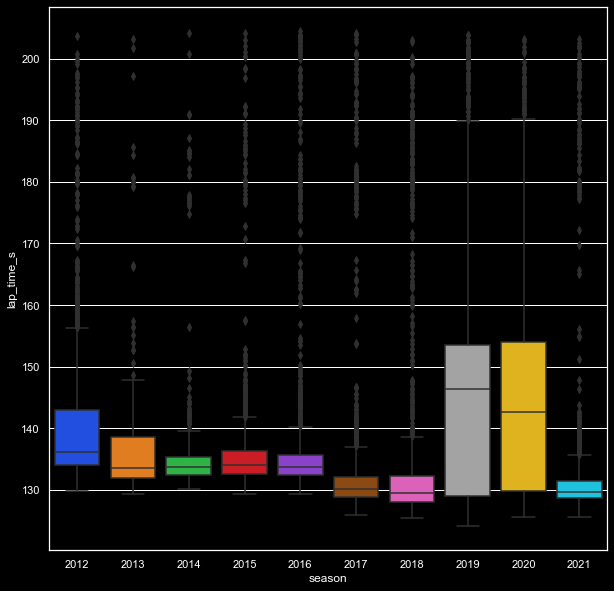

In [17]:
#let's plot the data for LMP2s by year/season
sns.set(rc={'figure.figsize':(10,10)})
plt.style.use('dark_background')
sns.boxplot(data = spa_data_fixed_season_lmp2_w_cutoff, x = 'season', y = 'lap_time_s', palette = 'bright')

In [20]:
#so this is pretty interesting! most of the races from 2014 to 2018 and 2021 had relatively low lap times
#where as 2019 and 2020 races had very high lap times, something that could explain this was that the 2019 and 2020 races had a lot of wet running
#driving in the wet will always increase lap times, so that will explain why they were really high for those two years.

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,t6,t7,porsche,ford,vehicle,flag_at_fl,team_no,lap_time_ms,lap_time_s,engine
5428,35.0,1.0,1.0,2:47.393,0.0,NaN,50.817,0.0,1:16.713,0.0,...,NaN,NaN,NaN,NaN,Morgan,NaN,Oak Racing #35,167393.0,167.393,Nissan
5429,35.0,1.0,2.0,2:33.526,0.0,NaN,42.555,0.0,1:12.516,0.0,...,NaN,NaN,NaN,NaN,Morgan,NaN,Oak Racing #35,153526.0,153.526,Nissan
5430,35.0,1.0,3.0,2:31.961,0.0,NaN,41.934,0.0,1:11.876,0.0,...,NaN,NaN,NaN,NaN,Morgan,NaN,Oak Racing #35,151961.0,151.961,Nissan
5431,35.0,1.0,4.0,2:30.610,0.0,NaN,41.583,0.0,1:10.648,0.0,...,NaN,NaN,NaN,NaN,Morgan,NaN,Oak Racing #35,150610.0,150.610,Nissan
5432,35.0,1.0,5.0,2:29.959,0.0,NaN,41.423,0.0,1:10.221,0.0,...,NaN,NaN,NaN,NaN,Morgan,NaN,Oak Racing #35,149959.0,149.959,Nissan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,43.0,1.0,77.0,2:19.058,0.0,NaN,39.811,0.0,1:03.706,0.0,...,NaN,NaN,NaN,NaN,Norma MP 2000,NaN,Extreme Limit Aric #43,139058.0,139.058,Judd
8888,43.0,1.0,78.0,2:19.916,0.0,NaN,39.815,0.0,1:03.382,0.0,...,NaN,NaN,NaN,NaN,Norma MP 2000,NaN,Extreme Limit Aric #43,139916.0,139.916,Judd
8889,43.0,1.0,79.0,2:23.290,0.0,NaN,42.694,0.0,1:04.149,0.0,...,NaN,NaN,NaN,NaN,Norma MP 2000,NaN,Extreme Limit Aric #43,143290.0,143.290,Judd
8890,43.0,1.0,80.0,2:31.469,0.0,NaN,46.719,0.0,1:05.685,0.0,...,NaN,NaN,NaN,NaN,Norma MP 2000,NaN,Extreme Limit Aric #43,151469.0,151.469,Judd
